## Task 1: Generate and plot the elementary signals in DSP (Impulse, unit impulse, ramp, and exponential signals).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Unit Impulse

In [ ]:
def unit_impulse(a, n):
    delta =[]
    for sample in n:
        if sample == a:
            delta.append(1)
        else:
            delta.append(0)
              
    return delta

In [ ]:
a = 4
UL = 10
LL = -10
n = np.arange(LL, UL, 1)
d = unit_impulse(a, n)

Text(0.5, 1.0, 'Unit Impulse d[n]')

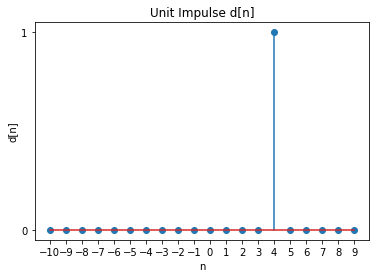

In [ ]:
plt.stem(n, d)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 1))
plt.yticks([0, 1])
plt.ylabel('d[n]')
plt.title('Unit Impulse d[n]')

#### Unit Step

In [ ]:
def unit_step(a, n):
    unit =[]
    for sample in n:
        if sample<a:
            unit.append(0)
        else:
            unit.append(1)
    return(unit)

In [ ]:
a = 2 
UL = 10
LL = -10
n = np.arange(LL, UL, 1)
unit = unit_step(a, n)

Text(0.5, 1.0, 'Unit step u[n-a]')

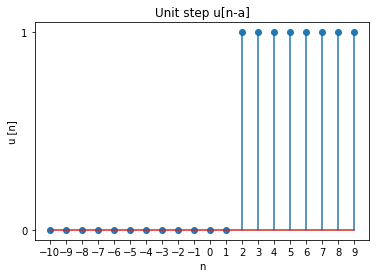

In [ ]:
plt.stem(n, unit)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 1))
plt.yticks([0, 1])
plt.ylabel('u [n]')
plt.title('Unit step u[n-a]')

#### Unit Ramp

In [ ]:
def unit_ramp(n):
    ramp =[]
    for sample in n:
        if sample<0:
            ramp.append(0)
        else:
            ramp.append(sample)
    return ramp

In [ ]:
UL = 10
LL = -10
n = np.arange(LL, UL, 1)
r = unit_ramp(n)


Text(0.5, 1.0, 'Unit Ramp r [n]')

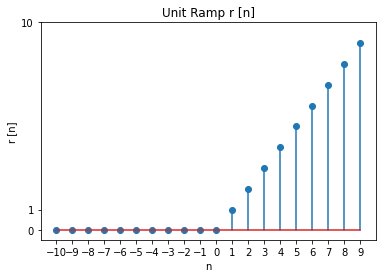

In [ ]:
plt.stem(n, r)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 1))
plt.yticks([0, UL, 1])
plt.ylabel('r [n]')
plt.title('Unit Ramp r [n]')

#### Exponential Signals

In [ ]:
def exponential(a, n):
    expo =[]
    for sample in n:
        expo.append(np.exp(a * sample))
    return (expo)
         


In [ ]:
a = 2
UL = 1
LL = -1
n = np.arange(LL, UL, 0.1)
x = exponential(a, n)


Text(0.5, 1.0, 'Exponential Signal e**(an)')

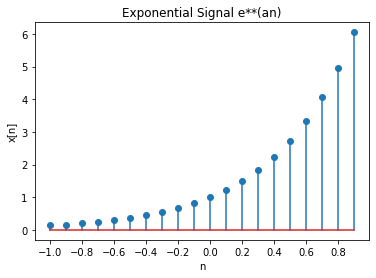

In [ ]:
plt.stem(n, x)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 0.2))
plt.ylabel('x[n]')
plt.title('Exponential Signal e**(an)')

## Task 2: Compute the linear convolution of two signals.

In [ ]:
x = [1,1,1,1]
y = [1,2,3,4]

#### Built-In Function

In [ ]:
ans_conv1 = np.convolve(x, y, mode='full')
print(ans_conv1)

#### User-Defined Function

In [1]:
import numpy as np

def convolution(A,B):
  lengthA=np.size(A)
  lengthB=np.size(B)
  C = np.zeros(lengthA + lengthB -1,dtype=int)
  for m in np.arange(lengthA):
    for n in np.arange(lengthB):
      C[m+n] = C[m+n] + A[m]*B[n]

  return C

In [ ]:
ans_conv2 = convolution(x,y)
print(ans_conv2)

## Task 3: Compute the cross-correlation sequence of two signals x(n) and h(n).

In [7]:
x = [1,1,1,1]
y = [1,2,3,4]

#### Built-In Function

In [ ]:
ans_corr1 = np.correlate(x, y,mode='full') 
print(ans_corr1)

[ 4  7  9 10  6  3  1]


#### User-Defined Function

In [11]:
def crosscorrelation(A,B):
    return convolution(np.conj(A),B[::-1])

In [12]:
ans_corr2 = crosscorrelation(x,y)
print(ans_corr2)

[ 4  7  9 10  6  3  1]


## Task 4: Determine the autocorrelation sequence of the signal x(n).

In [ ]:
x = [1,1,1,1]
y = [1,2,3,4]

#### Built-In Function

In [ ]:
ans_corrx1 = np.correlate(x, x,mode='full') 
print(ans_corrx1)

[1 2 3 4 3 2 1]


In [ ]:
ans_corry1 = np.correlate(y, y,mode='full') 
print(ans_corry1)

[ 4 11 20 30 20 11  4]


#### User-Defined Function

In [ ]:
ans_corrx2 = crosscorrelation(x,x)
print(ans_corrx2)

[1 2 3 4 3 2 1]


In [ ]:
ans_corry2 = crosscorrelation(y,y)
print(ans_corry2)

[ 4 11 20 30 20 11  4]


## Task 5: Compute Discrete Fourier Transform (DFT) of a signal using DFT equation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

#### Built-In Function

In [ ]:
import numpy as np
from numpy.fft import fft,ifft
import scipy as sy
from matplotlib import pyplot as plt

In [ ]:
x = [0,1,2,3]
N = len(x)
X = fft(x,N);
X

array([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

#### User-Defined Function

In [ ]:
def DFT(x):
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [ ]:
x = [0,1,2,3]
X = DFT(x)
X

array([ 6.+0.j, -2.+2.j, -2.-0.j, -2.-2.j])

## Task 6: Compute inverse DFT of the signal obtained in (5). Cross check your results with Matlab/Python library functions.

#### Built-In Function

In [ ]:
import numpy as np
from numpy.fft import fft,ifft
import scipy as sy
from matplotlib import pyplot as plt

In [ ]:
X = np.array([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [ ]:
x = ifft(X)
x = np.real(x)
x

array([0., 1., 2., 3.])

#### User-Defined Function

In [ ]:
def IDFT(X):

    N = len(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    x = np.dot(e, X)

    x = x/N
    
    return x

In [ ]:
X = np.array([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])
x = IDFT(X)
x = np.real(x)
x

array([0., 1., 2., 3.])

## Task 7: By means of the DFT and IDFT, determine the response of the FIR filter with impulse response h(n) to the input sequence x(n).

In [ ]:
def DFT_P(x, N):
    
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [ ]:
def IDFT_P(X, N):

    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    x = np.dot(e, X)

    x = x/N
    
    return x

In [2]:
h = [1,2,3]
x = [1,2,2,1]

In [3]:
tot = convolution(h,x)
tot = len(tot)

In [ ]:
for i in range(tot - len(x)):
    x.append(0)
for i in range(tot - len(h)):
    h.append(0)

In [ ]:
x_dft = DFT_P(x,tot)

In [ ]:
h_dft = DFT_P(h,tot)

In [ ]:
pro_x_h = x_dft*h_dft

In [ ]:
answer = IDFT_P(pro_x_h, tot)
answer = np.real(answer)
answer

array([ 1.,  4.,  9., 11.,  8.,  3.])

## Task 8: Compute the Fast Fourier Transform (FFT) using divide and conquer approach (e.g N=2 x N/2).

#### Built-In Function

In [ ]:
x = [0,1,2,3,4,5,6,7]
re_b = np.fft.fft(x)
re_b = np.around(gh.real, 2) + np.around(gh.imag, 2) * 1j
re_b

array([28.+0.j  , -4.+9.66j, -4.+4.j  , -4.+1.66j, -4.+0.j  , -4.-1.66j,
       -4.-4.j  , -4.-9.66j])

#### User-Defined Function

In [ ]:
import cmath
import numpy as np

In [ ]:
def FFT_DC(nums, N):
    L = nums.shape[0]
    M = nums.shape[1]
    rows, cols = (L, M)
    arr = [[0]*cols for _ in range(rows) ]
    for p in range(L):
        for q in range(M):
            LL = 0
            for l in range(L):
                wen = np.exp(-2j * np.pi * l * q / N)
                MM = DFT(nums[l])
                wel = np.exp(-2j * np.pi * l * p / L)
                LL += (wen * MM * wel)
            arr[p][q] = np.round(LL.real, 2) + np.round(LL.imag, 2) * 1j
    return arr

In [ ]:
x = np.array([0,1,2,3,4,5,6,7])
x_ori = x
N = len(x)
x = x.reshape(4, 2)
x = x.T

In [ ]:
result = FFT_DC(x, N)
resultN  = []
for i in range(len(result)):
    rowr = []
    for j in range(len(result[i])):
        rowr.append(result[i][j][j])
    resultN.append(rowr)
resultN = np.array(resultN)

In [ ]:
resultN = np.array(resultN)
resultN = resultN.flatten()
resultN

array([28.+0.j  , -4.+9.66j, -4.+4.j  , -4.+1.66j, -4.+0.j  , -4.-1.66j,
       -4.-4.j  , -4.-9.66j])

In [ ]:
np.allclose(resultN, re_b)

True

## Task 9: Compute the FFT of a given signal with N = 8 using Radix-2 algorithm.

In [ ]:
import numpy as np
from numpy.fft import fft,ifft
import scipy as sy
from matplotlib import pyplot as plt

#### Built-In Function

In [ ]:
x = [0,1,2,3,4,5,6,7]
np.fft.fft(x)

array([28.+0.j  , -4.+9.66j, -4.+4.j  , -4.+1.66j, -4.+0.j  , -4.-1.66j,
       -4.-4.j  , -4.-9.66j])

#### User-Defined Function

In [ ]:
def FFT_Radix_2(x):

    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])

        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, 
                            X_even+factor[int(N/2):]*X_odd])
        
        return X

In [ ]:
x = [0,1,2,3,4,5,6,7]
FFT_Radix_2(x)

array([28.+0.j  , -4.+9.66j, -4.+4.j  , -4.+1.66j, -4.-0.j  , -4.-1.66j,
       -4.-4.j  , -4.-9.66j])

In [ ]:
np.allclose(FFT_Radix_2(x), np.fft.fft(x))

True